In [1]:
import sys
import os
import random
from collections import Counter
import numpy as np
from scipy.stats import rankdata, kendalltau, spearmanr
# Package
import somhos.resources.dataset as rd
import somhos.resources.queries as rq
from somhos.methods.useful import save_pickle, load_pickle
from somhos.config.paths import *

Default path

In [2]:
data_path = "../../src/somhos/resources/aminer/v9gamma"

Load samples

In [3]:
# Load sample A
docs_sample_a_path = get_relative_path(data_path, DOCS_SAMPLE_A_SUFFIX)
docs_sample_a = load_pickle(docs_sample_a_path)
# Load sample B
docs_sample_b_path = get_relative_path(data_path, DOCS_SAMPLE_B_SUFFIX)
docs_sample_b = load_pickle(docs_sample_b_path)

print("Samples size: (%d, %d)" % (len(docs_sample_a), len(docs_sample_b)))

Samples size: (5000, 5000)


Load samples content

In [4]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 10000


Load cosine similarity with vectors of TF

In [5]:
m_tf = load_pickle(get_relative_path(data_path, SIM_TF_TOKENS))
print(m_tf)

m_tf_kps = load_pickle(get_relative_path(data_path, SIM_TF_KEYPHRASES))
print(m_tf_kps)

[[0.02715224 0.01118565 0.02424854 ... 0.03645305 0.00992867 0.0254809 ]
 [0.03927258 0.03698001 0.02312486 ... 0.03544545 0.0164122  0.0382911 ]
 [0.03115607 0.         0.02446083 ... 0.00351499 0.00651014 0.06075487]
 ...
 [0.03653373 0.13760418 0.01434143 ... 0.04533857 0.03816905 0.03116811]
 [0.04034949 0.01329792 0.02217505 ... 0.02549219 0.03541071 0.04819284]
 [0.07293783 0.012019   0.01002119 ... 0.1008022  0.02667093 0.02489026]]
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.0232621 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.0232621 0.        0.       ]]


Load cosine similarity with vectors of TF-IDF

In [6]:
m_tf_idf = load_pickle(get_relative_path(data_path, SIM_TF_IDF_TOKENS))
print(m_tf_idf)

m_tf_idf_kps = load_pickle(get_relative_path(data_path, SIM_TF_IDF_KEYPHRASES))
print(m_tf_idf_kps)

[[0.01075387 0.00206247 0.00420691 ... 0.00566958 0.00147329 0.0079679 ]
 [0.00313217 0.01103955 0.01155472 ... 0.01543637 0.00282845 0.00718103]
 [0.00373985 0.         0.00749853 ... 0.00558708 0.00154656 0.02780748]
 ...
 [0.00126982 0.02567927 0.00055769 ... 0.00533172 0.00415633 0.00597354]
 [0.00616515 0.00312923 0.00174796 ... 0.00822055 0.00276756 0.02864622]
 [0.00437217 0.00440589 0.00088447 ... 0.01827149 0.00584807 0.00173718]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00350385 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00314453 0.         0.        ]]


In [7]:
m_lsi = load_pickle(get_relative_path(data_path, SIM_LSI_TOKENS))
print(m_lsi)

m_lsi_kps = load_pickle(get_relative_path(data_path, SIM_LSI_KEYPHRASES))
print(m_lsi_kps)

[[ 0.02513037  0.141316    0.02632272 ...  0.06444909 -0.01126173
   0.05515726]
 [ 0.01470423  0.0685428   0.05061026 ...  0.07871956  0.0986802
  -0.01690415]
 [ 0.13891867  0.10860755  0.0305339  ...  0.00449824  0.05154251
   0.07045452]
 ...
 [ 0.05724837  0.3334916   0.09221857 ...  0.03875815  0.1471766
   0.08071506]
 [ 0.01437034  0.04622507  0.04237908 ... -0.00349112  0.01745393
   0.09998006]
 [-0.00728584  0.09992644  0.02864362 ...  0.09511814  0.06700154
  -0.00303796]]
[[ 0.04901934 -0.01900038  0.01640376 ... -0.00660064 -0.03096492
   0.05128833]
 [ 0.06836876  0.0663556   0.01043638 ...  0.00733038 -0.04142345
   0.05377237]
 [-0.00816166  0.07246591  0.00266101 ... -0.03566226  0.03998308
  -0.0238801 ]
 ...
 [-0.04416259 -0.00163119 -0.01194347 ...  0.02512399 -0.04515243
   0.04749171]
 [ 0.06602723  0.10086485 -0.02096481 ... -0.01058421 -0.04260207
   0.01897058]
 [-0.0183723   0.06090527 -0.0027932  ... -0.02124197 -0.03903206
  -0.0303857 ]]


Means to order matrices

In [8]:
m_lda = load_pickle(get_relative_path(data_path, SIM_LDA_TOKENS))
print(m_lda)

m_lda_kps = load_pickle(get_relative_path(data_path, SIM_LDA_KEYPHRASES))
print(m_lda_kps)

[[0.01829003 0.00882718 0.02972517 ... 0.01080808 0.04364888 0.04932617]
 [0.00935027 0.         0.00320305 ... 0.04812923 0.00786025 0.01995298]
 [0.00832194 0.01102977 0.03320563 ... 0.02951414 0.00291206 0.04879011]
 ...
 [0.00282068 0.09945898 0.17145985 ... 0.01784726 0.15361811 0.00663526]
 [0.03156796 0.02383944 0.01298784 ... 0.10568854 0.04205342 0.02332468]
 [0.07188128 0.11832463 0.12080266 ... 0.00327449 0.03007236 0.00681601]]
[[0.         0.02688589 0.12552762 ... 0.06588558 0.         0.04804951]
 [0.         0.         0.         ... 0.04026262 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.06498992]
 ...
 [0.         0.         0.         ... 0.04642697 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.09837767 0.1439393  0.        ]]


In [9]:
m_word2vec = load_pickle(get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF))
print(m_word2vec)

m_word2vec_kps = load_pickle(get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_KPS))
print(m_word2vec_kps)

[[0.65026507 0.6352724  0.51125832 ... 0.70741633 0.53963897 0.63119034]
 [0.5617378  0.55335334 0.48273909 ... 0.61529872 0.60382952 0.46528783]
 [0.57255337 0.65461743 0.51519611 ... 0.66796163 0.57828285 0.62439063]
 ...
 [0.69814095 0.75335527 0.57345115 ... 0.66531861 0.70799736 0.64402167]
 [0.66652319 0.7462082  0.56672043 ... 0.72681021 0.63652852 0.61732316]
 [0.59589472 0.67401673 0.56727652 ... 0.68569787 0.6261404  0.58359683]]
[[0.4308252  0.46092489 0.25156474 ... 0.53535328 0.33720741 0.43388834]
 [0.4332573  0.47743951 0.37647243 ... 0.55057405 0.55530767 0.36347259]
 [0.3466539  0.38661425 0.33447691 ... 0.41947611 0.42869596 0.39422269]
 ...
 [0.41816378 0.4478462  0.348465   ... 0.46241594 0.47159042 0.44217885]
 [0.50347543 0.57928714 0.33142323 ... 0.61184987 0.51755772 0.51304573]
 [0.44150739 0.54036326 0.43194542 ... 0.52334593 0.5163729  0.45019183]]


In [10]:
m_ref = m_word2vec
# m_ref = m_tf_kps
# m_ref = m_tf_idf_kps

# Means sample a
means_sample_a = np.divide(np.sum(m_ref, axis=1), len(docs_sample_b))
# Means sample b
means_sample_b = np.divide(np.sum(m_ref, axis=0), len(docs_sample_a))
# Ordered means
ordered_indices_m = means_sample_a.argsort()[::-1]
ordered_indices_n = means_sample_b.argsort()[::-1]

docs_sample_a = list(np.array(docs_sample_a)[ordered_indices_m])
docs_sample_b = list(np.array(docs_sample_b)[ordered_indices_n])

Order matrices by means

In [11]:
m_ref = m_ref[ordered_indices_m,:][:,ordered_indices_n]

# TF
m_tf = m_tf[ordered_indices_m,:][:,ordered_indices_n]
m_tf_kps = m_tf_kps[ordered_indices_m,:][:,ordered_indices_n]

# TF-IDF 
m_tf_idf = m_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_tf_idf_kps = m_tf_idf_kps[ordered_indices_m,:][:,ordered_indices_n]

# LSI
m_lsi = m_lsi[ordered_indices_m,:][:,ordered_indices_n]
m_lsi_kps = m_lsi_kps[ordered_indices_m,:][:,ordered_indices_n]

# LDA
m_lda = m_lda[ordered_indices_m,:][:,ordered_indices_n]
m_lda_kps = m_lda_kps[ordered_indices_m,:][:,ordered_indices_n]

# word2vec 
m_word2vec = m_word2vec[ordered_indices_m,:][:,ordered_indices_n]
m_word2vec_kps = m_word2vec_kps[ordered_indices_m,:][:,ordered_indices_n]


In [12]:
matrices = [
    (m_tf, "TF", "$sim_{wf}(d_i, d_j)$"),
    (m_tf_kps, "TF (Keyphrases)", "$sim_{kf}(d_i, d_j)$"),
    (m_tf_idf, "TF-IDF", "$sim_{wfidf}(d_i, d_j)$"),
    (m_tf_idf_kps, "TF-IDF (Keyphrases)", "$sim_{kfidf}(d_i, d_j)$"),
    (m_lsi, "LSI", "$sim_{wlsi}(d_i, d_j)$"),
    (m_lsi_kps, "LSI (Keyphrases)", "$sim_{klsi}(d_i, d_j)$"),
    (m_lda, "LDA", "$sim_{wlda}(d_i, d_j)$"),
    (m_lda_kps, "LDA (Keyphrases)", "$sim_{klda}(d_i, d_j)$"),
    (m_word2vec, "Word2vec similarities TF-IDF", "$sim_{tw}(d_i, d_j)$"),
    (m_word2vec_kps, "Word2vec similarities TF-IDF(keyphrases)", "$sim_{tk}(d_i, d_j)$")
]

In [13]:
m_ref_name = matrices[1][2]

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['figure.dpi']= 250
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['image.interpolation'] = 'none'
mpl.rcParams['image.lut'] = 2
mpl.rcParams['image.resample'] = False
mpl.rcParams['font.size'] = 22

In [15]:
mmm = np.array([
    [0, 2, 3],
    [5, 7, 9],
    [12, 15, 18]]
)

nnn = np.array([
    [30, 25, 20],
    [8, 12, 16],
    [6, 3, 50]]
)

def mean(X):
    EX = X.mean(1)
    return EX 

def subtract(X):
    EX = mean(X)
    subtract_X = np.subtract(X.transpose(), EX).transpose()
    return subtract_X

def sigma(X):
    subtract_X = subtract(X)
    sum_EX_EX = np.sum(subtract_X**2, 1)
    sigma_X = np.sqrt(np.divide(sum_EX_EX, (X.shape[1] - 1)))
    return sigma_X

def cov(X, Y):
    subtract_X = subtract(X)
    subtract_Y = subtract(Y)
    cov_XY = np.sum((subtract_X)*(subtract_Y), 1)/X.shape[0]
    return cov_XY

def pearson(X, Y):
    cov_XY = cov(X, Y)
    sigma_X = sigma(X)
    sigma_Y = sigma(Y)
    # p = np.array([((cxy/(sigma_X*sigma_Y)[i]) if (sigma_X*sigma_Y)[i] != 0 else float('inf') ) for i, cxy in enumerate(cov_XY)])
    # if cov is zero X Y Are uncorrelated
    p = np.array([((cxy/(sigma_X*sigma_Y)[i]) if cxy else 0.0) for i, cxy in enumerate(cov_XY)])
    return p

print(cov(mmm, nnn), pearson(mmm, nnn))

[-5.          5.33333333 44.        ] [-0.65465367  0.66666667  0.55740877]


In [16]:
# rgX = tf.divide(tf.convert_to_tensor(np.array(list(map(ss.rankdata, sess.run(X))))) , n)
# rgY = tf.divide(tf.convert_to_tensor(np.array(list(map(ss.rankdata, sess.run(Y))))) , n)
def rg(Mat):
    rgMat = np.array(list(map(rankdata, Mat)))
    return rgMat

def spearman(X, Y):
    n_shape = X.shape[1]
    denominator = n_shape * (n_shape**2 - 1)
    r_s = 1 - np.divide(6*np.sum((rg(X) - rg(Y))**2, 1), denominator)
    return r_s

def spearman2(X, Y):
    print(X, Y)
    print(list(map(lambda x, y: np.stack((x, y), axis=1), X, Y)))
    r_s = np.array([rho for rho, _ in map(lambda x, y: spearmanr(np.stack((x, y), axis=1)), X, Y)])
    return r_s

def kendall(X, Y):
    tau = np.array([tau for tau, _ in map(kendalltau, X, Y)])
    return tau

rgX_ = rg(mmm)
print(rgX_)
print("----")
rgY_ = rg(nnn)
print(rgY_)
print("####")
print(spearman(mmm, nnn))
print(spearman2(mmm, nnn))
print("****")
print(kendall(mmm, nnn))

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
----
[[3. 2. 1.]
 [1. 2. 3.]
 [2. 1. 3.]]
####
[-1.   1.   0.5]
[[ 0  2  3]
 [ 5  7  9]
 [12 15 18]] [[30 25 20]
 [ 8 12 16]
 [ 6  3 50]]
[array([[ 0, 30],
       [ 2, 25],
       [ 3, 20]]), array([[ 5,  8],
       [ 7, 12],
       [ 9, 16]]), array([[12,  6],
       [15,  3],
       [18, 50]])]
[-1.   1.   0.5]
****
[-1.          1.          0.33333333]


TF
TF (Keyphrases)
TF-IDF
TF-IDF (Keyphrases)
LSI
LSI (Keyphrases)
LDA
LDA (Keyphrases)
Word2vec similarities TF-IDF
Word2vec similarities TF-IDF(keyphrases)


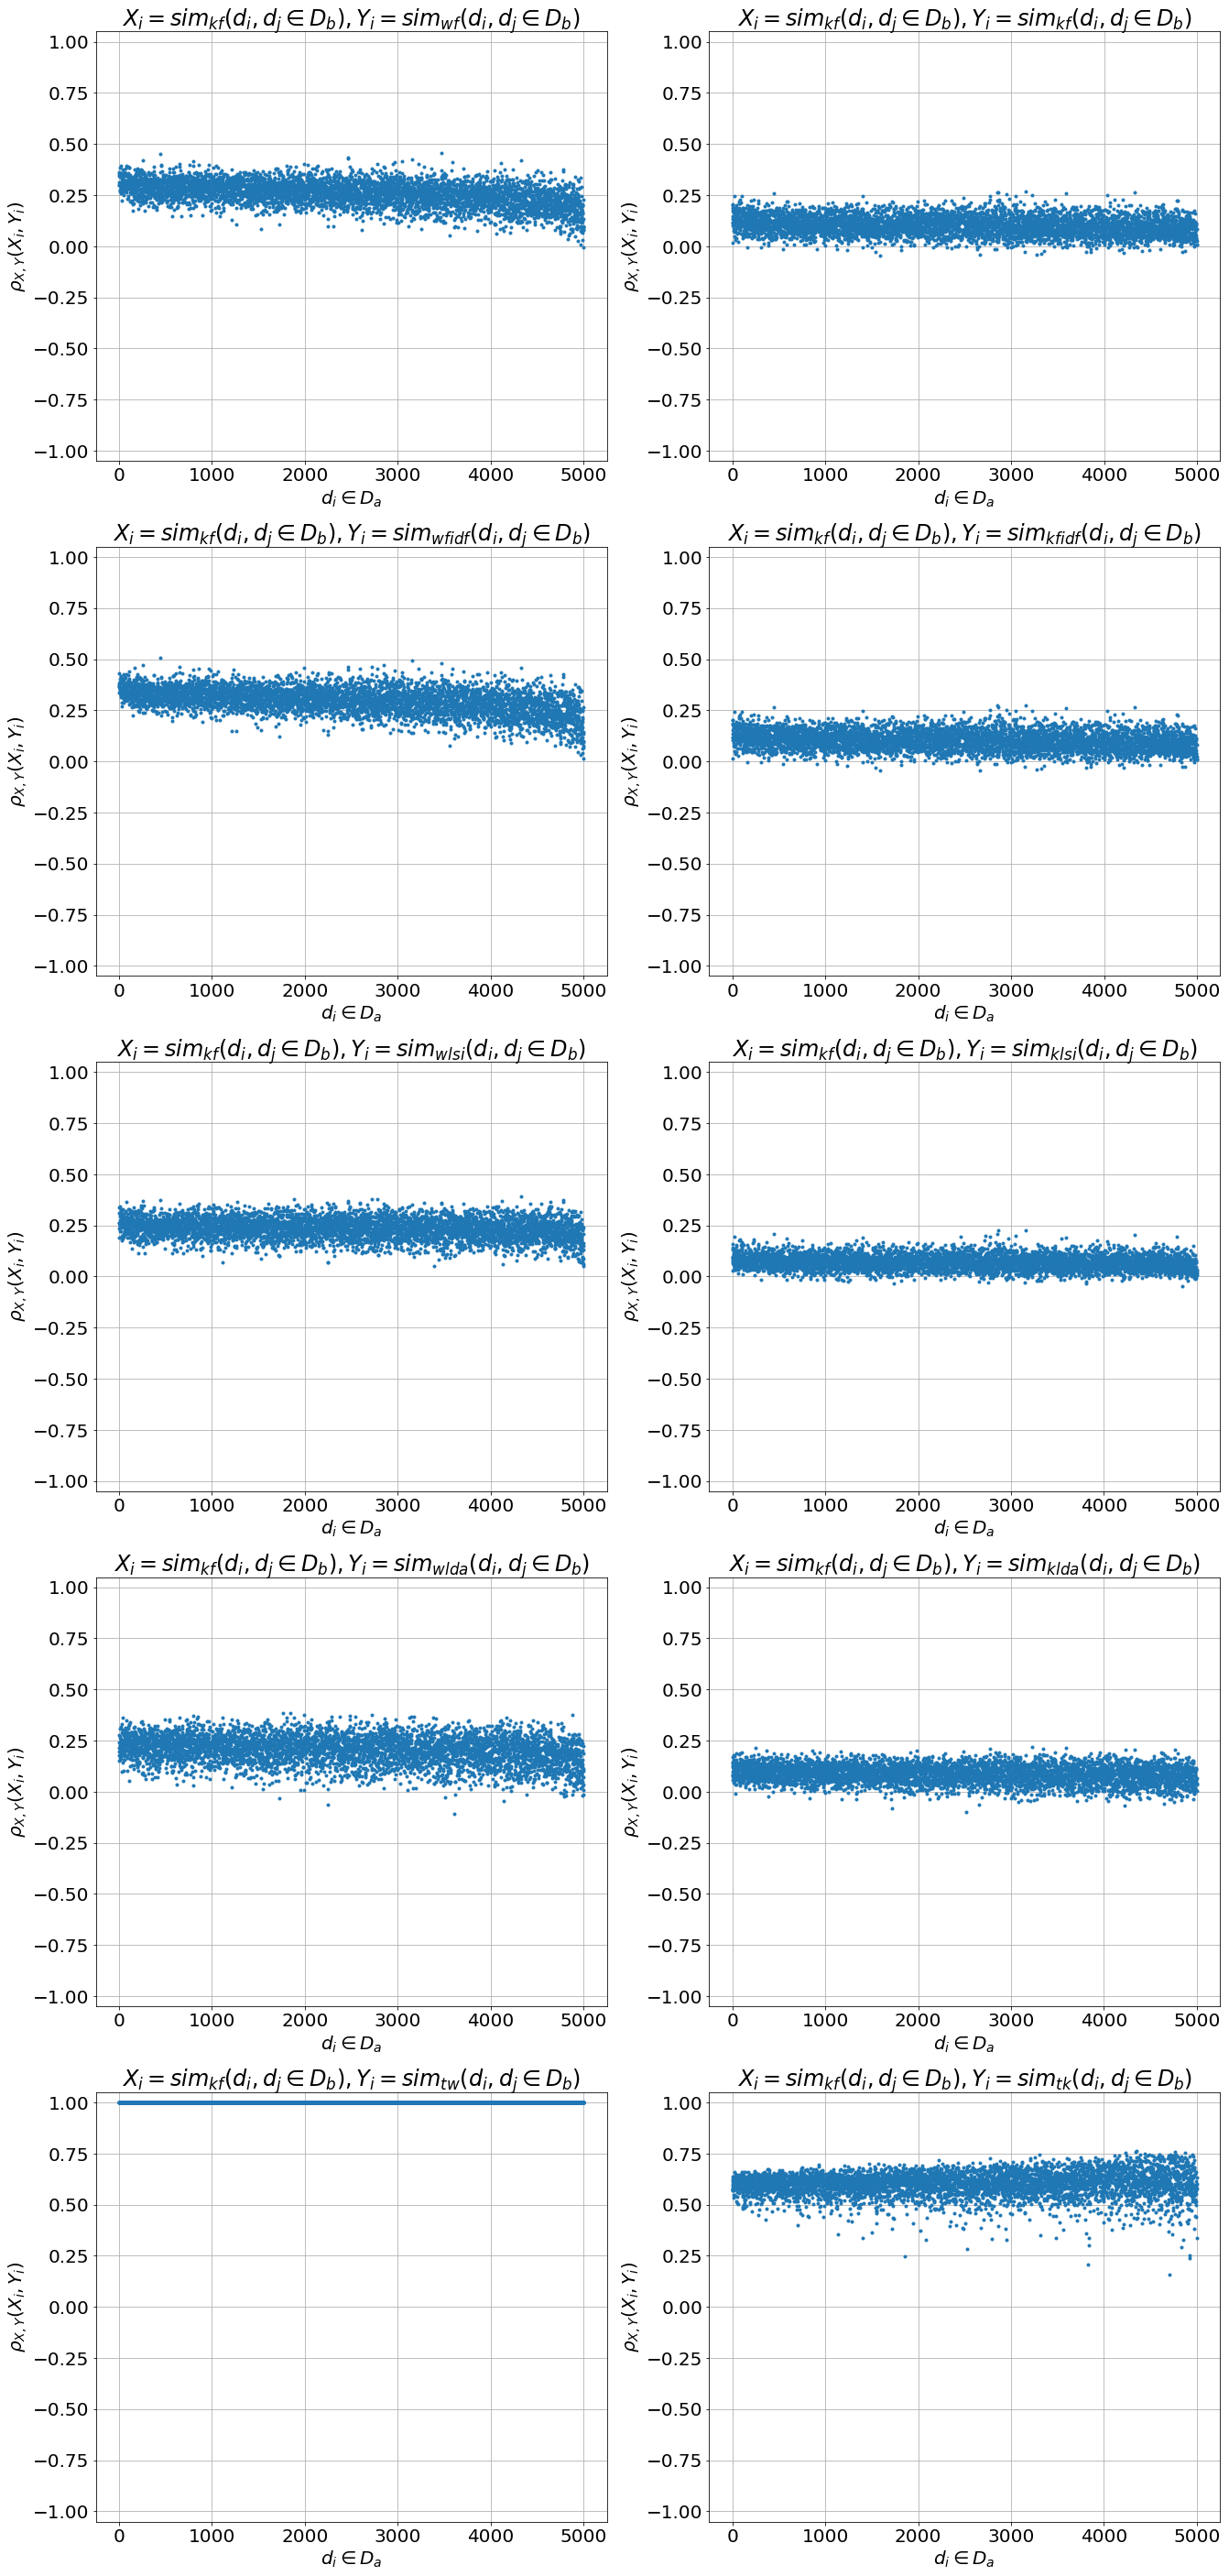

In [17]:
nrows = int(np.ceil(len(matrices)/2))
ncols = 2

mpl.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 50))
# fig.suptitle("Stats")

X = m_ref 
matrices_iter = iter(matrices)
for i in range(0, nrows):
    for j in range(0, ncols):
        matrix, title, title2 = next(matrices_iter)
        Y = matrix
        # data
        # axes[i][j].plot(cov(X, Y), '.')
        # axes[i][j].plot(spearman(X, Y), '.')
        axes[i][j].plot(kendall(X, Y), '.')
        # axes[i][j].plot(spearman2(X, Y), '.')
        # axes[i][j].plot(pearson(X, Y), '.')
        axes[i][j].set_ylim([-1.05, 1.05])
        print(title)
        title_fmt = r'X_i = ' + m_ref_name + r', Y_i = ' + title2
        title_fmt = r'$' + title_fmt.replace("d_j", "d_j \in D_b").replace("$", "") + r'$' 
        # print(title_fmt)
        axes[i][j].set_title(title_fmt)
        axes[i][j].set_xlabel(r'$d_i \in D_a$')
        axes[i][j].set_ylabel(r'$\rho_{X, Y}(X_i, Y_i)$')
        # axes[i][j].set_ylabel(r'$\rho_{X, Y}(' + m_ref_name + ', ' + title2.replace(r"$", "") +')$')
        axes[i][j].grid(True)
plt.show()

TF
TF-IDF
LSI
LDA
Word2vec similarities TF-IDF


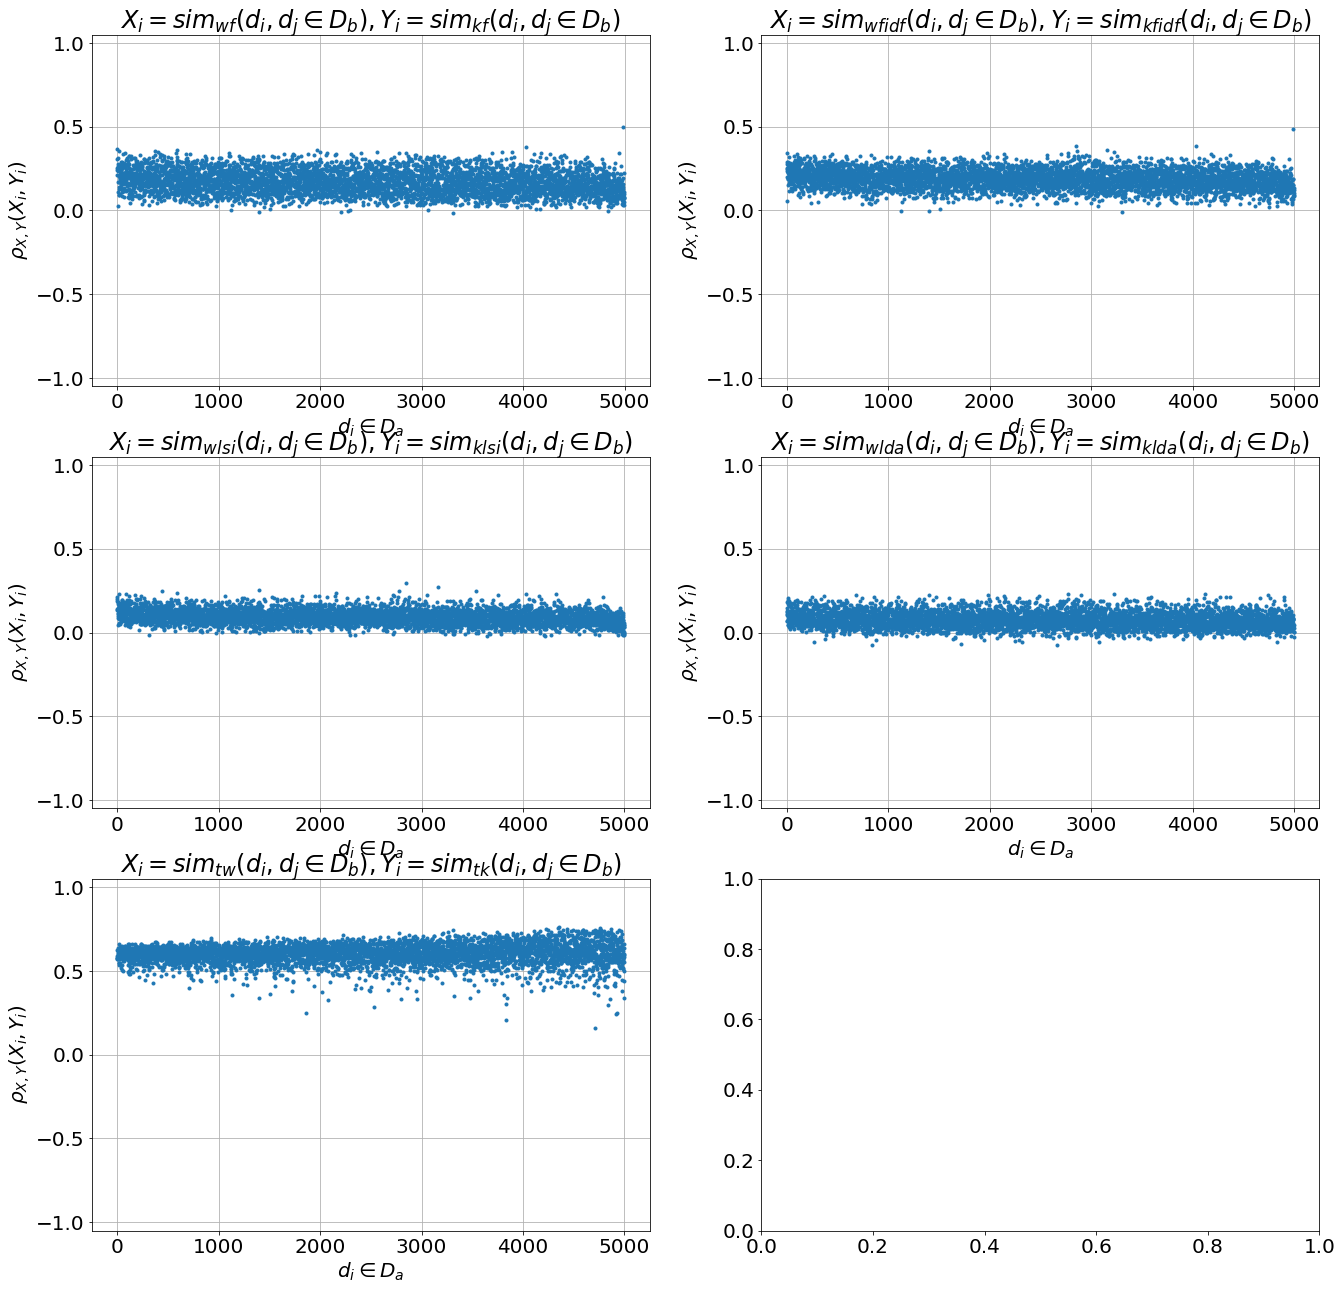

In [18]:
nrows = int(np.ceil(len(matrices)/4))
ncols = 2

mpl.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 22))
# fig.suptitle("Stats")

# X = m_ref
matrices_iter = iter(matrices)
for i in range(0, nrows):
    for j in range(0, ncols):
        try:
            X, x_title, x_title2 = next(matrices_iter)
            Y, y_title, y_title2 = next(matrices_iter)
        except StopIteration:
            continue
        # data
        # axes[i][j].plot(cov(X, Y), '.')
        # axes[i][j].plot(spearman(X, Y), '.')
        axes[i][j].plot(kendall(X, Y), '.')
        # axes[i][j].plot(spearman2(X, Y), '.')
        # axes[i][j].plot(pearson(X, Y), '.')
        axes[i][j].set_ylim([-1.05, 1.05])
        print(x_title)
        title_fmt = r'X_i = ' + x_title2 + r', Y_i = ' + y_title2
        title_fmt = r'$' + title_fmt.replace("d_j", "d_j \in D_b").replace("$", "") + r'$' 
        # print(title_fmt)
        axes[i][j].set_title(title_fmt)
        axes[i][j].set_xlabel(r'$d_i \in D_a$')
        axes[i][j].set_ylabel(r'$\rho_{X, Y}(X_i, Y_i)$')
        # axes[i][j].set_ylabel(r'$\rho_{X, Y}(' + m_ref_name + ', ' + title2.replace(r"$", "") +')$')
        axes[i][j].grid(True)
plt.show()

Above, means there is less correlation between word and keyphrases measures when using methods with emphasis in content than with methods based on word2vec, mostly it could be a problem of a very general centroid. It is not easy to interpret. 